# Import libraries

In [1]:
# pip install statsmodels

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing the dataset

In [3]:
df = pd.read_csv('data/riceClassification.csv')

# 1.0 Dataset description

In [4]:
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [5]:
print('Total number of rows are:', df.shape[0])
print('Total number of columns are:', df.shape[1])

Total number of rows are: 18185
Total number of columns are: 12


In [6]:
columns=df.columns.to_list()
print(columns)

['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness', 'AspectRation', 'Class']


**All attributes are numeric variables and they are listed bellow:**

* id
* Area
* MajorAxisLength
* MinorAxisLength
* Eccentricity
* ConvexArea
* EquivDiameter
* Extent
* Perimeter
* Roundness
* AspectRation
* Class

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


**It is clear from the above output that there are no categorical columns present in the dataset**

In [8]:
df.isna().sum(axis=0)

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

**count the number of missing values in each column, the above output that there are no missing value in the column**

In [9]:
df.describe()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081,0.549079
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836,0.497599
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128,0.000000
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527,0.000000
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966,1.000000
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101,1.000000
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845,1.000000


**INFERENCE**
* The dataset conatins 10 features (Area to AspectRation) and 1 label (Class)
* There are 18185 entires of data which is quite perfect for Machine Learning
* there are no categorical columns present in the dataset, most of the features are of float64 datatype
* There are no missing value in any features or data i.e. the dataset is quite clean

# 2.0 EDA

### The distribution of the Class Column

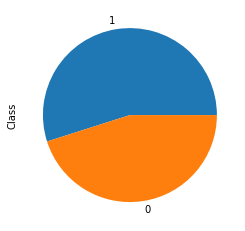

In [10]:
# Checking whether dataset is balanced or not
piechart = df['Class'].value_counts().plot(kind='pie')
fig1 = piechart.get_figure()

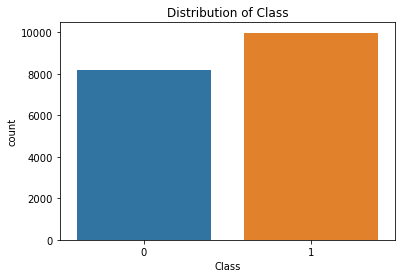

In [11]:
import seaborn as sns
# Check the distribution of Class
sns.countplot(x='Class', data=df)
plt.title('Distribution of Class')
plt.show()

**From the above output figure it is clear that the output classes are pretty well balanced and there is no need of sampling.**

###  Drop id column

In [12]:
df = df.drop(columns = 'id', axis = 1)

### Building correlation matrix

In [13]:
correlation_mat=df.corr()
correlation_mat

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
Area,1.000000,0.599939,0.930215,-0.550073,0.999362,0.998158,0.230541,0.881540,0.620490,-0.623979,-0.816589
MajorAxisLength,0.599939,1.000000,0.273211,0.295717,0.602061,0.618002,-0.073549,0.870178,-0.202566,0.240471,-0.147741
MinorAxisLength,0.930215,0.273211,1.000000,-0.808640,0.928992,0.923790,0.308541,0.674249,0.834398,-0.860516,-0.917766
Eccentricity,-0.550073,0.295717,-0.808640,1.000000,-0.547896,-0.534688,-0.329954,-0.165915,-0.903657,0.950301,0.788636
ConvexArea,0.999362,0.602061,0.928992,-0.547896,1.000000,0.997403,0.227359,0.886987,0.610236,-0.621472,-0.814214
EquivDiameter,0.998158,0.618002,0.923790,-0.534688,0.997403,1.000000,0.225944,0.891567,0.607432,-0.609957,-0.809361
Extent,0.230541,-0.073549,0.308541,-0.329954,0.227359,0.225944,1.000000,0.073227,0.366793,-0.350875,-0.303440
Perimeter,0.881540,0.870178,0.674249,-0.165915,0.886987,0.891567,0.073227,1.000000,0.186063,-0.227256,-0.533274
Roundness,0.620490,-0.202566,0.834398,-0.903657,0.610236,0.607432,0.366793,0.186063,1.000000,-0.947875,-0.831759
AspectRation,-0.623979,0.240471,-0.860516,0.950301,-0.621472,-0.609957,-0.350875,-0.227256,-0.947875,1.000000,0.832563


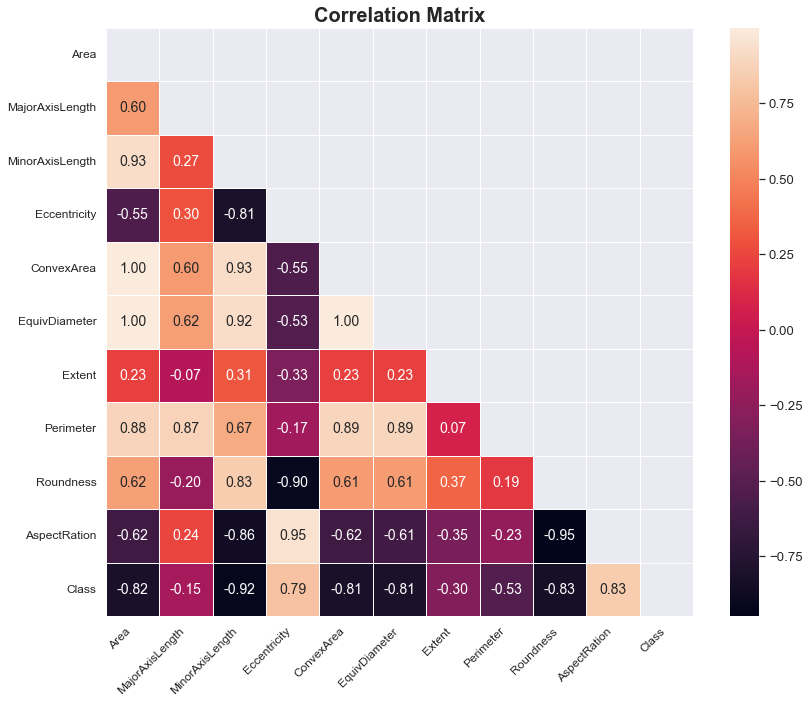

In [14]:
corr_features = correlation_mat.index

plt.figure(figsize=(12,10))
sns.set(font_scale=1.2)

# Set mask to display only the lower triangular part of the heatmap
mask = np.zeros_like(df[corr_features].corr())
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(df[corr_features].corr(), annot=True, fmt='.2f', 
                linewidths=.5, annot_kws={"size": 14}, mask=mask)

g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right', fontsize=12)
g.set_yticklabels(g.get_yticklabels(), rotation=0, ha='right', fontsize=12)
plt.title('Correlation Matrix', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


**INFERENCE:**

**The highest negative correlations are between:**

* feature-to-feature - Roundness and AspectRatio (-0.95), Roundness and Eccentricity (-0.90), MinorAxisLenght and AxisRatio (-0.86), MinorAxisLenght and Eccentricity (-0.81)

* feature-to-class - MinorAxisLenght (-0.92), Roundness (-0.83), Area (-0.82), ConvexArea (-0.81), EquivDiameter (-0.81)

**The highest positive correlations are between:**

* feature-to-feature - AspectRatio and Eccentricity (0.95), Area and MinorAxisLenght (0.93), MinorAxisLenght and ConvexArea (0.93), MinorAxisLenght and EquivDiameter (0.92), ConvexArea and Perimeter (0.89), EquivDiameter and Perimeter (0.89), Area and Perimeter (0.88), MajorAxisLenght and Perimeter (0.87), MinorAxisLength and Roudness (0.83)

* feature-to-class - AspectRatio (0.83), Eccentricity (0.79)

**We can see that ,MinorAxisLength,AspectRation,Roundness,Area,ConvexArea,EquivDiameter and Eccentricity have a very high correlation with the target variable.**

### Check Multicollinearity by using VIF

multicollinearity using Variable Inflation Factors (VIF). Unlike Correlation matrix, VIF determines the strength of the correlation of a variable with a group of other independent variables in a dataset. VIF starts usually at 1 and anywhere exceeding 10 indicates high multicollinearity between the independent variables.

In [15]:
def VIF(dataframe,chosen_cols):
    from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
    from statsmodels.tools.tools import add_constant
    X=dataframe[chosen_cols]
    X=add_constant(X)
    vif_data=pd.DataFrame()
    vif_data["feature"]=X.columns
    vif_data["VIF"]=[VIF(X.values, i) for i in range(len(X.columns))]
    return vif_data

In [16]:
chosen_cols=['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness', 'AspectRation']

VIF(df,chosen_cols)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,VIF
0,const,103954.790226
1,Area,2347.459870
2,MajorAxisLength,318.714833
3,MinorAxisLength,1296.490608
4,Eccentricity,51.971818
5,ConvexArea,1813.854237
6,EquivDiameter,2844.995049
7,Extent,1.157557
8,Perimeter,346.462939
9,Roundness,157.668241


**In the context of calculating VIF (Variance Inflation Factor), a VIF value of 10 or higher is often considered a sign of multicollinearity between the independent variables.here we have super high values,Let’s try to drop some of the correlated features to see if it help us in bringing down the multicollinearity between correlated features**

In [17]:
new_chosen_cols=["MajorAxisLength","Roundness","Eccentricity","Extent"]
VIF(df,new_chosen_cols)

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,VIF
0,const,8707.834300
1,MajorAxisLength,1.123905
2,Roundness,5.753991
3,Eccentricity,5.876661
4,Extent,1.155467


**VIF values for all the independent variables have decreased to a considerable extent.**

# 3.0 Data Preprocessing

### Inter Quartile Range to detect outliers

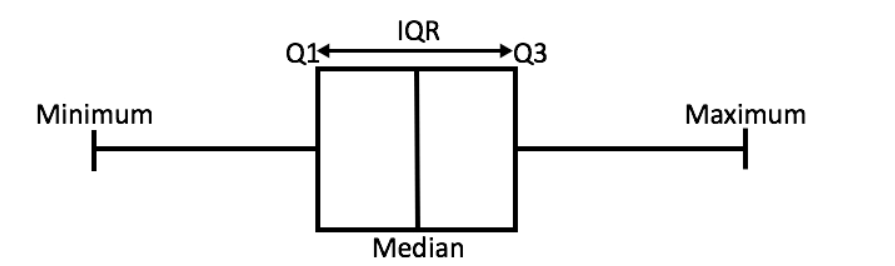

* minimum is the minimum value in the dataset and maximum is the maximum value in the dataset. So the difference between the two tells us about the range of dataset.

* The median is the median (or centre point), also called second quartile, of the data (resulting from the fact that the data is ordered).

* Q1 is the first quartile of the data, i.e., to say 25% of the data lies between minimum and Q1.

* Q3 is the third quartile of the data, i.e., to say 75% of the data lies between minimum and Q3.

* The difference between Q3 and Q1 is called the Inter-Quartile Range or IQR.

### Box Plot of each feature before Outlier Detection

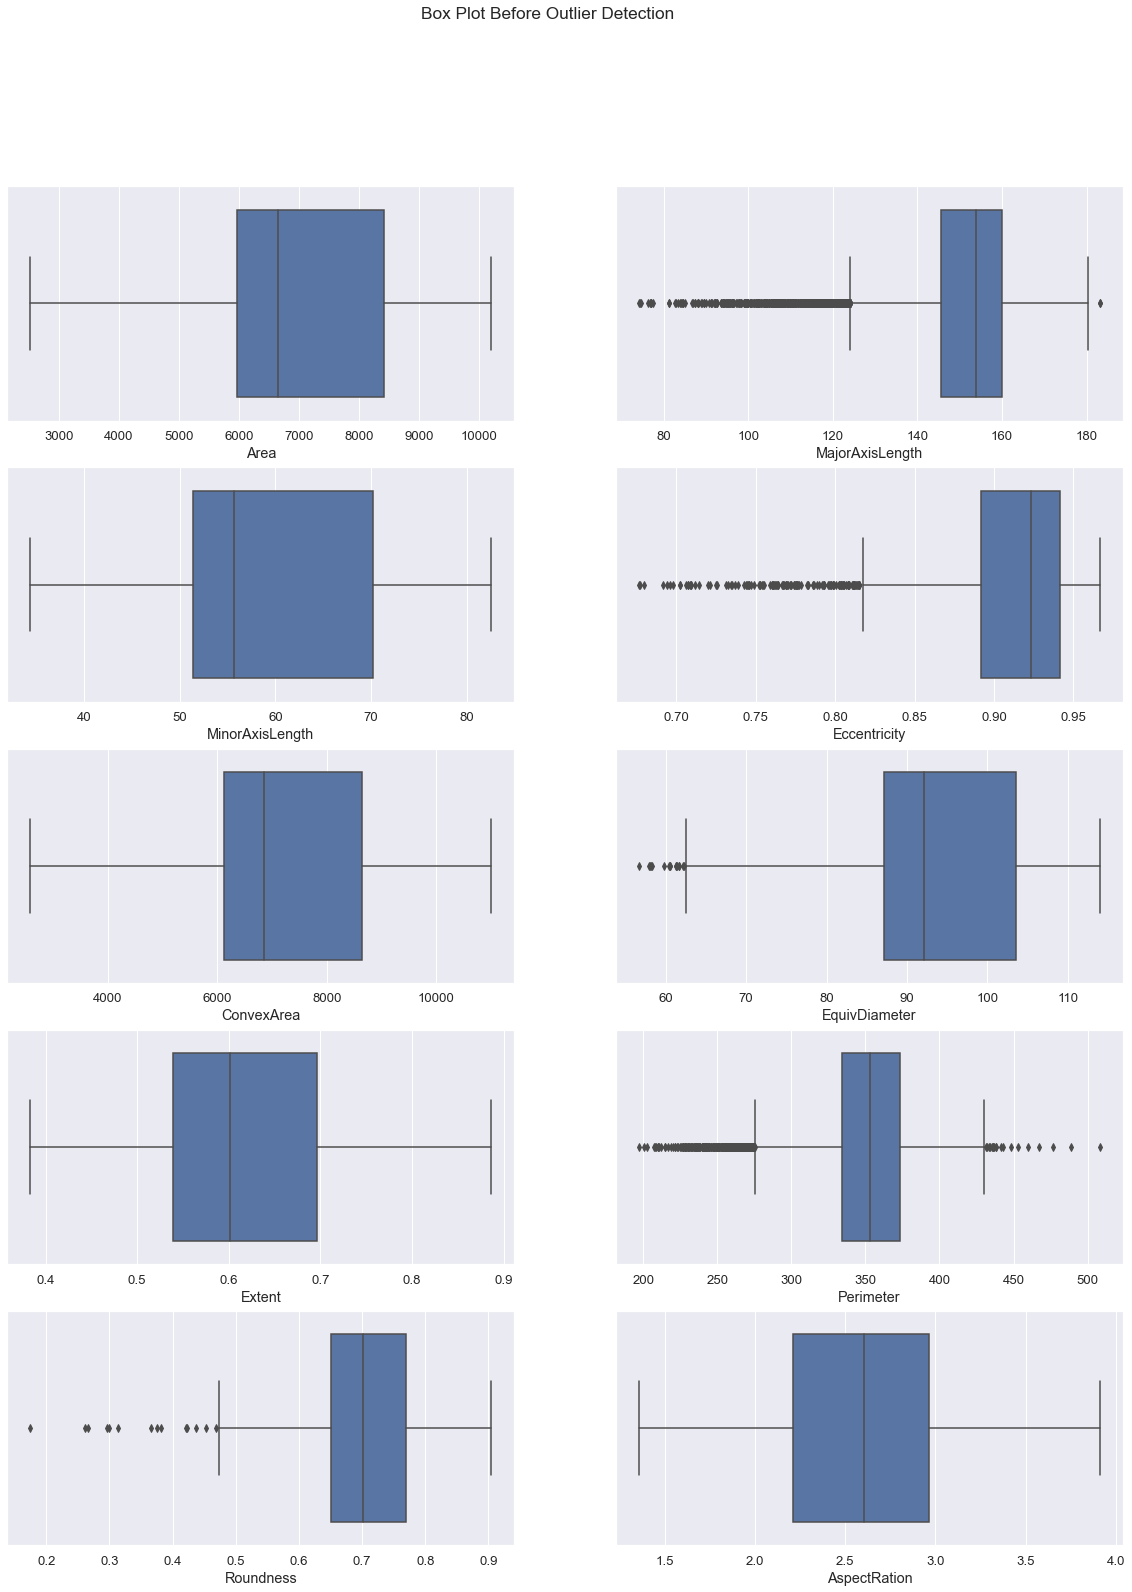

In [18]:
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot Before Outlier Detection')
k = 0
for i in range(0,5):
    for j in range(0,2):
        sns.boxplot(ax=axes[i,j], data=df, x=df.columns[k])
        k=k+1

### Removing the outliers

In [19]:
 """
    Calculates the Interquartile Range (IQR) for a given column in df 
    Returns the upper and lower bounds of the IQR.
"""
def iqr_calculation(col):
    Q1 = np.percentile(col, 25)
    Q3 = np.percentile(col, 75)
    IQR = Q3 - Q1
    upper = np.where(col >= (Q3 + 1.5 * IQR))[0]
    lower = np.where(col <= (Q1 - 1.5 * IQR))[0]
    return upper, lower
    
def remove_outliers(df, col_name):
    upper, lower = iqr_calculation(df[col_name])
    if len(upper) == 0 and len(lower) == 0:
        print("No outliers are removed")
        return df
    else:
        df = df.drop(upper).drop(lower)
        print("New Shape: ", df.shape)
        return df.reset_index(drop=True)

In [20]:
main_df = df.copy()

for col in main_df.columns[:-1]:
    print('For', col)
    main_df = remove_outliers(main_df, col)

df = main_df

For Area
No outliers are removed
For MajorAxisLength
New Shape:  (17647, 11)
For MinorAxisLength
No outliers are removed
For Eccentricity
New Shape:  (17631, 11)
For ConvexArea
No outliers are removed
For EquivDiameter
No outliers are removed
For Extent
No outliers are removed
For Perimeter
New Shape:  (17602, 11)
For Roundness
New Shape:  (17597, 11)
For AspectRation
No outliers are removed


### Box Plot of each feature after Outlier Detection

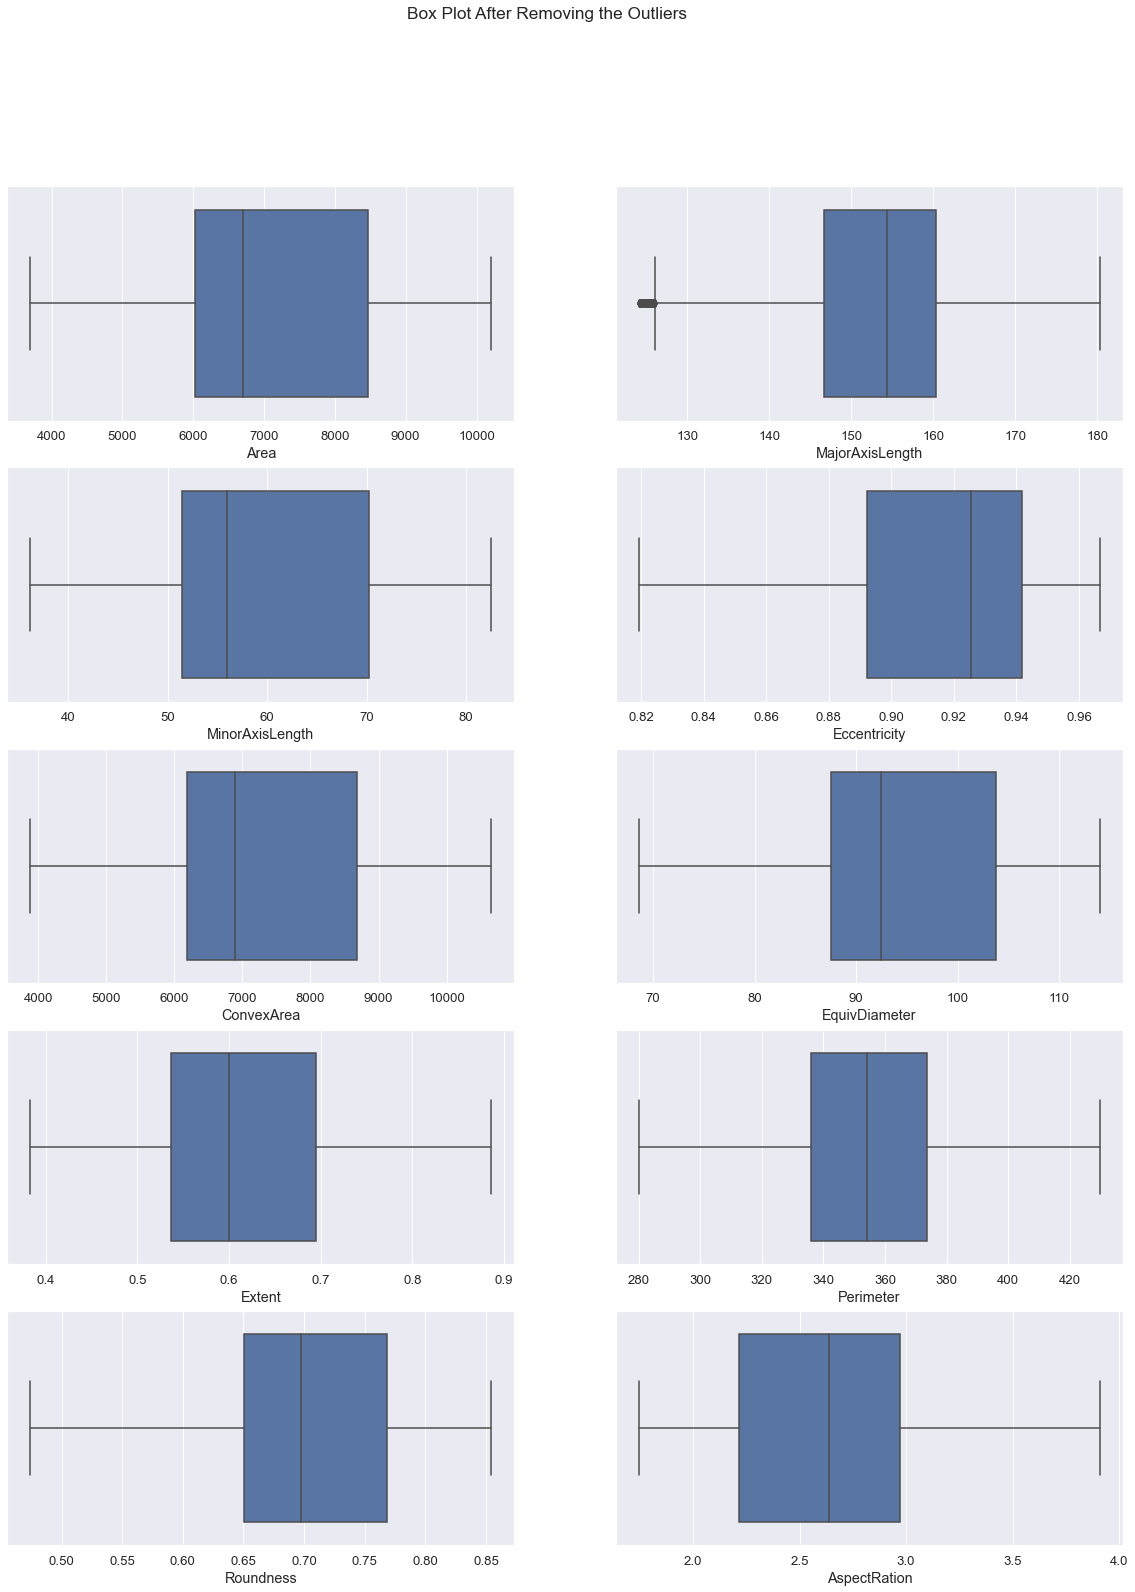

In [21]:
fig, axes = plt.subplots(5,2, figsize=(20,25))
fig.suptitle('Box Plot After Removing the Outliers')
k = 0
for i in range(0,5):
    for j in range(0,2):
        col_name = df.columns[k]
        sns.boxplot(ax=axes[i,j], data=df,x=col_name)
        k=k+1

In [22]:
df.shape

(17597, 11)

# 4.0 Splitting the train and test data

In [23]:
X=df[["MajorAxisLength","Roundness","Eccentricity","Extent"]]
y=df["Class"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

### Standardization

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.22947603, -0.79852573,  0.73387877,  0.50650271],
       [ 0.37240698,  0.76111001, -0.96377629, -0.11797718],
       [ 0.59292898, -1.66834014,  1.56394508, -1.88201494],
       ...,
       [ 1.08939692, -0.82063083,  0.91627689, -1.31857217],
       [-0.10765373, -0.9658156 ,  0.32824037, -1.03881585],
       [ 0.40863635,  0.80903888, -0.66096941, -0.4926156 ]])

In [25]:
X_test = scaler.transform(X_test)
X_test

array([[-1.17932721, -0.29294766,  0.44123002, -0.43392902],
       [ 1.35059936, -0.21465292,  0.65135606, -1.26869849],
       [ 1.0511613 ,  1.14707079, -1.48612111, -0.17214309],
       ...,
       [-1.29257639,  0.76827926, -1.07253233,  0.12099944],
       [ 0.06774699,  0.56091168, -0.43711659,  1.4088493 ],
       [ 0.5792953 , -0.98653376,  1.12399191,  1.10935002]])

In [26]:
#Decisison Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
y_model = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9821969696969697

In [28]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_model))
print(confusion_matrix(y_test, y_model))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2409
           1       0.99      0.98      0.98      2871

    accuracy                           0.98      5280
   macro avg       0.98      0.98      0.98      5280
weighted avg       0.98      0.98      0.98      5280

[[2367   42]
 [  52 2819]]


[Text(0.44588765337423314, 0.96875, 'x[2] <= -0.072\ngini = 0.497\nsamples = 12317\nvalue = [5646, 6671]'),
 Text(0.22555598159509202, 0.90625, 'x[2] <= -0.273\ngini = 0.048\nsamples = 5670\nvalue = [5530, 140]'),
 Text(0.09758435582822086, 0.84375, 'x[0] <= -2.4\ngini = 0.025\nsamples = 5449\nvalue = [5379, 70]'),
 Text(0.05214723926380368, 0.78125, 'x[2] <= -0.962\ngini = 0.434\nsamples = 91\nvalue = [62, 29]'),
 Text(0.03680981595092025, 0.71875, 'x[0] <= -2.421\ngini = 0.089\nsamples = 64\nvalue = [61, 3]'),
 Text(0.024539877300613498, 0.65625, 'x[0] <= -2.734\ngini = 0.062\nsamples = 62\nvalue = [60, 2]'),
 Text(0.018404907975460124, 0.59375, 'x[0] <= -2.743\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.012269938650306749, 0.53125, 'x[0] <= -2.777\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.006134969325153374, 0.46875, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.018404907975460124, 0.46875, 'x[3] <= 0.359\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),


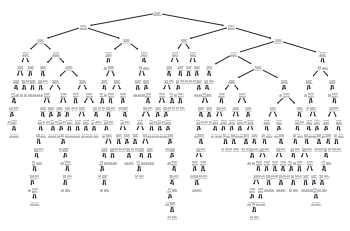

In [29]:
#Decisison Tree to buid the tree structure
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model1 = tree.DecisionTreeClassifier()
model1 = model1.fit(X_train, y_train)
y_model1 = model1.predict(X_test)
tree.plot_tree(model1)

In [30]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2 = model2.fit(X_train, y_train)
y_model2 = model2.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model2)

0.9910984848484848

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_model2))
print(confusion_matrix(y_test, y_model2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2409
           1       0.99      0.99      0.99      2871

    accuracy                           0.99      5280
   macro avg       0.99      0.99      0.99      5280
weighted avg       0.99      0.99      0.99      5280

[[2377   32]
 [  15 2856]]


In [33]:
#Logistics Regression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
model3 = linear_model.LogisticRegression()
model3 = model3.fit(X_train, y_train)
y_model3 = model3.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model3)

0.9903409090909091

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_model3))
print(confusion_matrix(y_test, y_model3))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2409
           1       0.99      1.00      0.99      2871

    accuracy                           0.99      5280
   macro avg       0.99      0.99      0.99      5280
weighted avg       0.99      0.99      0.99      5280

[[2371   38]
 [  13 2858]]


In [36]:
#Support Vector Classifier
from sklearn.svm import SVC
model4 = SVC()
model4 = model4.fit(X_train, y_train)
y_model4 = model4.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model4)

0.9899621212121212

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_model4))
print(confusion_matrix(y_test, y_model4))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2409
           1       0.99      1.00      0.99      2871

    accuracy                           0.99      5280
   macro avg       0.99      0.99      0.99      5280
weighted avg       0.99      0.99      0.99      5280

[[2370   39]
 [  14 2857]]


In [39]:
#importing libraries and packages
#pip install keras
#pip install tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

In [40]:
#initialize the ann
classifier = Sequential()

In [41]:
#input layer and first hidden layer is added (4 bcs 4 variables)
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 4))

In [42]:
#second hidden layer is added
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

In [43]:
#output layer is added
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [44]:
#compiling the ann
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [45]:
#fitting ann to training dataset (epoch to improve accuracy)
#rule of thumb to select epoch value is that it should be 3 times the number of columns in the data
#for batch size the size of 32 is the rule of thumb
classifier.fit(X_train, y_train, batch_size = 32, epochs = 12)

Epoch 1/12
385/385 [==============================] - 3s 3ms/step - loss: 0.4022 - accuracy: 0.9156
Epoch 2/12
385/385 [==============================] - 1s 3ms/step - loss: 0.0517 - accuracy: 0.9881
Epoch 3/12
385/385 [==============================] - 1s 3ms/step - loss: 0.0382 - accuracy: 0.9888
Epoch 4/12
385/385 [==============================] - 1s 3ms/step - loss: 0.0363 - accuracy: 0.9891
Epoch 5/12
385/385 [==============================] - 1s 3ms/step - loss: 0.0357 - accuracy: 0.9890
Epoch 6/12
385/385 [==============================] - 1s 3ms/step - loss: 0.0355 - accuracy: 0.9890
Epoch 7/12
385/385 [==============================] - 1s 3ms/step - loss: 0.0353 - accuracy: 0.9889
Epoch 8/12
385/385 [==============================] - 1s 3ms/step - loss: 0.0353 - accuracy: 0.9891
Epoch 9/12
385/385 [==============================] - 1s 3ms/step - loss: 0.0350 - accuracy: 0.9890
Epoch 10/12
385/385 [==============================] - 1s 3ms/step - loss: 0.0350 - accuracy: 0.9894

In [46]:
#predicting test result
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5) #(if 0 to 0.5 false)

165/165 [==============================] - 0s 2ms/step


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[2372   37]
 [  14 2857]]


0.9903409090909091

In [48]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
model5 = knn.fit(X_train, y_train)
y_pred_5 = knn.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_5)

0.9903409090909091

In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, y_model4))
print(confusion_matrix(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2409
           1       0.99      1.00      0.99      2871

    accuracy                           0.99      5280
   macro avg       0.99      0.99      0.99      5280
weighted avg       0.99      0.99      0.99      5280

[[2369   40]
 [  11 2860]]
